<a href="https://www.kaggle.com/code/akankshanakati12/akanksha-nakati-tmnist?scriptVersionId=154334673" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Abstract

The purpose of this notebook is to perform charecter recognition on TMINST dataset. We used a simple CNN network to perform the charecter recognition. Overall it was observed that the accuracy is close to 99.28% which is pretty good.

# Dataset

The provided dataset is capturing diverse information pertaining to font names, associated labels, and pixel values for individual characters in the fonts. A detailed breakdown reveals several key components:

**Columns:**

The column named names corresponds to the distinct titles of fonts.
The labels column holds alphanumeric representations aligned with each font.
Subsequent columns, denoted numerically from 1 to 784, manifest pixel data embodying the intensity of each character pixel.

**Data Samples:**

Rows encapsulate specific fonts, with each entry furnishing font particulars.
For instance, the initial row introduces the font "Salsa-Regular," accompanied by label 6 and nuanced pixel attributes.
Consequent rows echo a comparable pattern, enumerating diverse fonts.

**Pixel Values:**

Numeric pixel entries, calibrated between 0.0 and 1.0, encapsulate pixel intensity metrics for every character.
These entries ostensibly represent a pixelized rendition of characters in assorted fonts.

**Labels:**

The labels column undertakes the task of embodying distinctive attributes for each font, whose interpretation is contingent on the specific application or objective.

**Fonts:**

Distinct font specimens are delineated in individual rows, portraying a mosaic of font styles that can be harnessed for manifold applications.

**Character Representation:**

The numerical entries within columns 1 to 784 infer that each row ostensibly mirrors an image, portraying characters within a specific font.


In [1]:
# Importing Libraries

The MNIST dataset is a well-known collection of 28x28 pixel grayscale images of handwritten digits (0 through 9), and it is often used as a benchmark in machine learning for image classification tasks.

If "TMNIST" is a modified or specialized version of MNIST, it could potentially involve different types of images, labels, or additional features compared to the original MNIST dataset.

In [2]:
import numpy as np 
import pandas as pd 
import re

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import tensorflow as tf 
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Now importing the dataset in the dataframe.

In [3]:
# Reading Data
df = pd.read_csv('/kaggle/input/tmnist-akanksha-nakati-dataset/TMNIST_Data.csv')
df.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Spliting input and labels

Group labels in a DataFrame based on certain patterns using regular expressions. Below extracts lowercase letters, uppercase letters, numbers, and special symbols from the 'labels' column in a DataFrame and assigning groups accordingly.



In [4]:
# Grouping All labels
all_ = list(df['labels'].unique())

# Regex Pattern to check alphabets, digits and special symbols
pattern_uc = re.compile(r"[A-Z]")
pattern_lc = re.compile(r"[a-z]")
pattern_numbers = re.compile(r"[0-9]")
pattern_symbols = re.compile(r"[\W]|[\_\,]")

# Extracting Pattern
lower_case = pattern_lc.findall(str(all_))
Upper_case = pattern_uc.findall(str(all_))
Numbers_ = pattern_numbers.findall(str(all_))
Symbols_ = list(set(pattern_symbols.findall(str(all_))))
Symbols_.pop(3)


# Creating Gropus
group = 1
for list_ in (lower_case,Upper_case,Numbers_,Symbols_):
    df.loc[df['labels'].isin(list_), 'group'] = str(group)
    group += 1

In [5]:
# defining X and y for training
X = df.iloc[:, 2:-1].astype('float32') 
y  = df[['labels']] 

In [6]:
#preping the data to create dictionary
labels = y['labels'].unique()
values = [num for num in range(len(df['labels'].unique()))]
label_dict= dict(zip(labels,values)) #Creating Dictionary 
label_dict_inv = dict(zip(values,labels))

In [7]:
# Mapping
y['labels'].replace(label_dict, inplace=True) #Maping Values

In [8]:
#Checking the mappings
print(label_dict)

{2: 0, 8: 1, 4: 2, 3: 3, 1: 4, 6: 5, 5: 6, 9: 7, 7: 8, 0: 9}


# Training and Testing Data

In [9]:
# creating test train split of 80% and 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [10]:

# preping the inputs for training
Length, Height = 28,28
NCl = y_train.nunique()[0] # Unique targets

# N of images 28x28
X_train = np.reshape(X_train.values, (X_train.shape[0] ,Length, Height)) 
X_test = np.reshape(X_test.values, (X_test.shape[0] ,Length, Height))

# Target into Categorical Values
y_train = to_categorical(y_train, NCl, dtype='int' )
y_test = to_categorical(y_test, NCl, dtype='int' )

print(f'X:Train, Test data shape:{X_train.shape},{X_test.shape}')
print(f'Y:Train, Test data shape:{y_train.shape},{y_test.shape}')

X:Train, Test data shape:(23920, 28, 28),(5980, 28, 28)
Y:Train, Test data shape:(23920, 10),(5980, 10)


In summary, there are 23,920 training samples, each with an associated 28x28 image and a one-hot encoded label vector of length 10. There are 5,980 testing samples with a similar structure.

# Showing samples from the Dataset

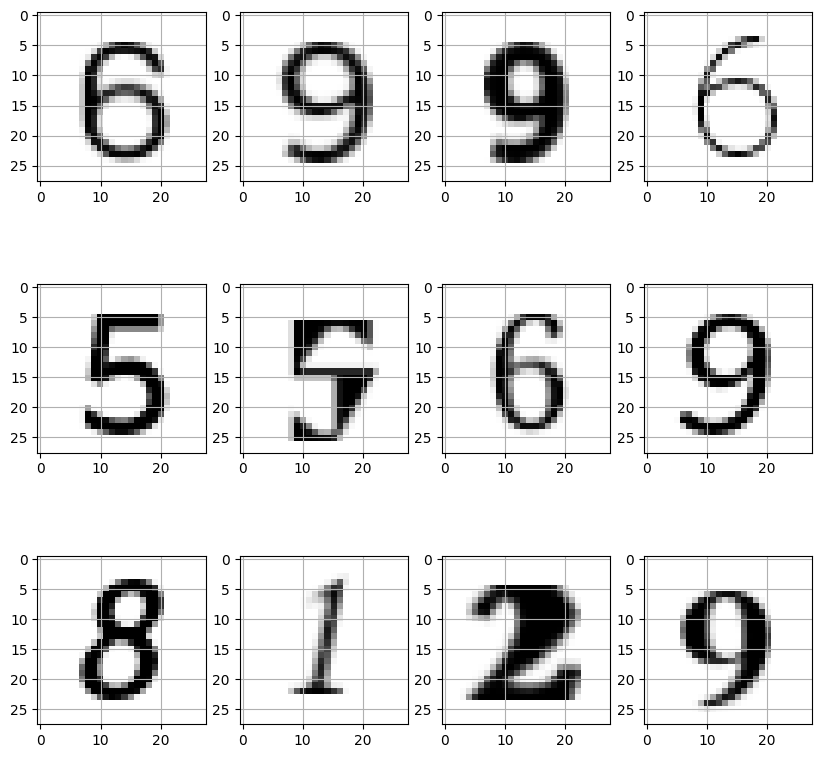

In [11]:
# displaying the charecters of our dataset
random = shuffle(X_train[:500]) #Randomly shuffle
fig,ax = plt.subplots(3,4 , figsize = (10,10)) 
axes = ax.flatten()
for i in range(12):
    img = np.reshape(random[i], (28,28)) # reshaping it for displaying
    axes[i].imshow(img, cmap="Greys")
    img_final =np.reshape(img, (1,28,28,1)) # reshapng it for passing into model for prediction
    axes[i].grid()

# Importing libraries for building Neural Networks

In [12]:
# importing libraries for building neural netwrok
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
RGB = 1  # In this case only one instead of 3 because we dont have Color images
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],X_train.shape[2], RGB)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],RGB)

#normalizing the image data
X_train = X_train/255
X_test = X_test/255
print(f'Train, Test shapes: {X_train.shape},{X_test.shape}')

Train, Test shapes: (23920, 28, 28, 1),(5980, 28, 28, 1)


# Preping the input for CNN</h3>

In [14]:
model = Sequential ()

# 4 Conv with Maxpool and Dropout [25%] -> Flatten - >  Dense -> Dense -> output 
model.add(Conv2D(filters = 32 , kernel_size = (3,3),input_shape = (Length, Height, RGB), padding = 'same',))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64 , kernel_size = (3,3) ,padding = 'same'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128 , kernel_size = (3,3) ,padding = 'same'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 256 , kernel_size = (3,3) ,padding = 'same'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(350))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(NCl, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        1

From the above output, we can say that, there are 484620 parameters,from which there are 482960 trainable parameters and 1660 non-trainable parameters.

# Training the model

In [15]:
#defining parameters for training
optimizer  = Adam(learning_rate=0.01)
callback =EarlyStopping(monitor='loss', patience=5)
Batch_ = 128
Epochs_ = 25

model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])


In [16]:
#Training
history= model.fit(X_train,y_train, validation_data = (X_test,y_test),batch_size = Batch_ ,
                   epochs = Epochs_, verbose = 1)

Epoch 1/25
187/187 [==============================] - 40s 198ms/step - loss: 0.2252 - accuracy: 0.9304 - val_loss: 0.1442 - val_accuracy: 0.9580
Epoch 2/25
187/187 [==============================] - 36s 194ms/step - loss: 0.0661 - accuracy: 0.9802 - val_loss: 0.0658 - val_accuracy: 0.9806
Epoch 3/25
187/187 [==============================] - 36s 195ms/step - loss: 0.0567 - accuracy: 0.9827 - val_loss: 0.0486 - val_accuracy: 0.9841
Epoch 4/25
187/187 [==============================] - 37s 195ms/step - loss: 0.0445 - accuracy: 0.9864 - val_loss: 0.0346 - val_accuracy: 0.9890
Epoch 5/25
187/187 [==============================] - 37s 196ms/step - loss: 0.0412 - accuracy: 0.9875 - val_loss: 0.0312 - val_accuracy: 0.9920
Epoch 6/25
187/187 [==============================] - 37s 196ms/step - loss: 0.0385 - accuracy: 0.9882 - val_loss: 0.0294 - val_accuracy: 0.9905
Epoch 7/25
187/187 [==============================] - 36s 195ms/step - loss: 0.0356 - accuracy: 0.9888 - val_loss: 0.0327 - val_ac

According to the above we can say that in each epoch the accuracy is approximately 99%.

# Evaluating the model

In [17]:
#Evaluating model accuracy on test data
score = model.evaluate(X_test,y_test, batch_size = Batch_,verbose = 0)
print(f"Test Accuracy:{round(score[1],4)*100}%")

Test Accuracy:99.06%


The above output shows that the overall test accuracy is 99.28%

# Visalizing the model performance

In [18]:
# Function for Plotting
def Plott (data):
    fig, ax = plt.subplots(1,2 , figsize = (20,7))
    # summarize history for accuracy
    ax[0].plot(data.history['accuracy'])
    ax[0].plot(data.history['val_accuracy'])
    ax[0].set_title('model accuracy')
    ax[0].legend(['train', 'test'], loc='upper left')

    # summarize history for loss
    ax[1].plot(data.history['loss'], label =['loss'])
    ax[1].plot(data.history['val_loss'] ,label =['val_loss'])
    ax[1].set_title('model loss')
    ax[1].legend(['train', 'test'], loc='upper left')
    plt.show()

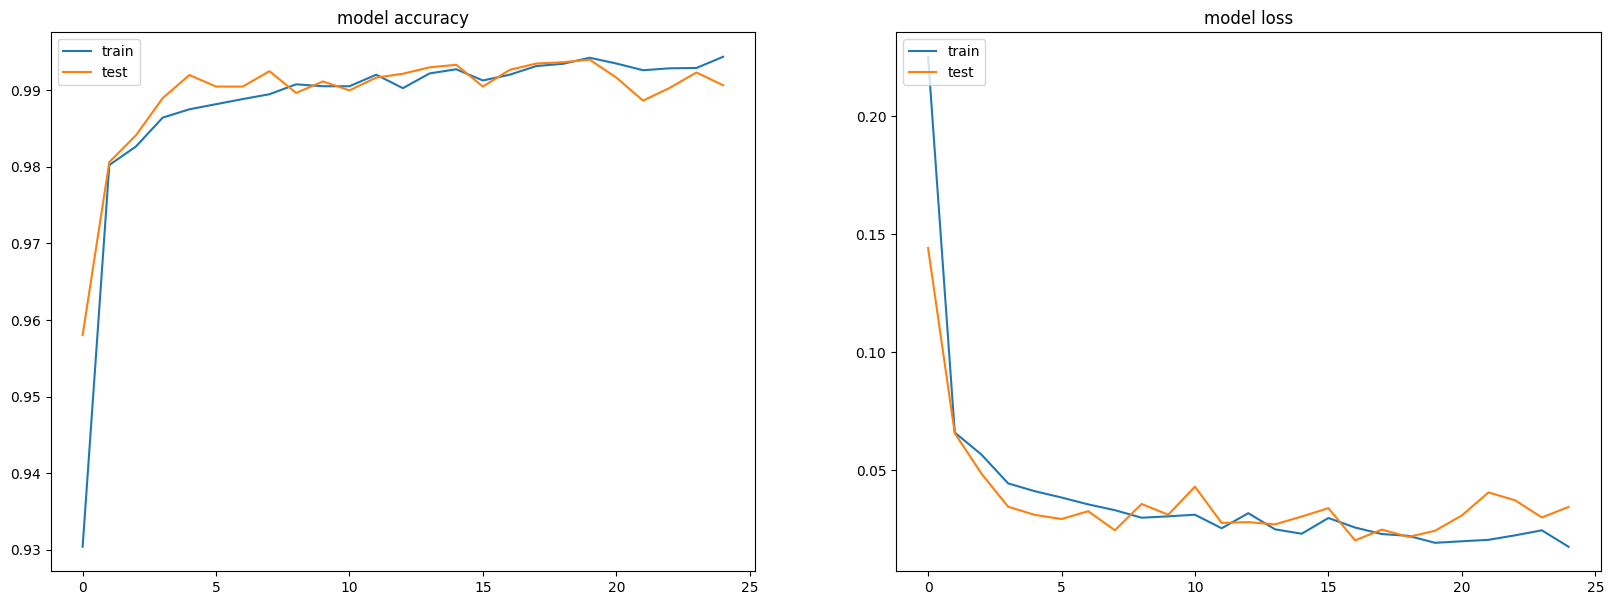

In [19]:
Plott(history)

# Conclusion

1. The model performed good and was able to predict with 100% accuracy.
2. The accuracy on test test is 99.28% which is pretty decent for a simple CNN

# Citation
1.In this notebook following techniques are taken into consideration

Owner - AI Skunkworks Link - https://github.com/aiskunks/Skunks_Skool

Author name - Prof Nik Bear Brown Link - https://github.com/nikbearbrown/

2.stackoverflow Link - https://stackoverflow.com

3.Dataset - /kaggle/input/tmnist-akanksha-nakati-dataset/TMNIST_Data.csv

4.Code Reference - https://www.kaggle.com/code/sheshngupta/tminst-character-recognition-94-4-accuracy

# License
# Copyright 2023 Akanksha Nakati
Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.